# Nuages de mots

## Imports et stopwords

In [41]:
from collections import Counter
from wordcloud import WordCloud
import os
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from IPython.display import Image

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\32465\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [42]:
# Stopwords (Idem que dans s1)
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout",
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu", "ville", "rossel", "dem","III","ETC","dès","elles","et","pour","seul","celui","alors","vers","effet","ailleurs",
       "tel","deja","culs","chez","l'","d'","bur'","faç'","mais","ces","leurs","meme","aux'","sur'","sans'","moins", "cas", "vue", "toujour", "ceux",
       "peu","moment","nos","seul","avoir","été","point","ici","quand","plus","fut","non","notre",]
sw = set(sw)


## Créer un fichier contenant le texte de tous les journaux d'une année donnée

In [43]:
# Définir les chemins d'accès
data_path = '../data'
txt_path = '../data/idependance'  # Ou un chemin spécifique à vos fichiers

# Liste des années de 1939 à 1950
years = [str(year) for year in range(1835, 1840)]  # 1953 exclu pour inclure 1952

# Réaliser le processus pour chaque année
for year in years:
    # Stocker le contenu des fichiers dans une liste
    content_list = []
    for txt in os.listdir(txt_path):
        if year in txt:
            with open(os.path.join(txt_path, txt), 'r', encoding='utf-8') as f:
                content_list.append(f.read())




In [44]:
# Écrire tout le contenu dans un fichier temporaire
temp_path = f'../data/tmp_{year}'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))


In [45]:
# Fonction pour nettoyer le texte
def clean_text(year, folder=None):
    if folder is None:
        input_path = f"{year}.txt"
        output_path = f"{year}_clean.txt"
    else:
        input_path = f"{folder}/{year}.txt"
        output_path = f"{folder}/{year}_clean.txt"
    
    output = open(output_path, "w", encoding='utf-8')
    with open(input_path, 'r', encoding='utf-8') as f:
        text = f.read()
        words = nltk.wordpunct_tokenize(text)
        sw = set(nltk.corpus.stopwords.words('english'))  # Ajoutez les stopwords appropriés ici
        kept = [w.upper() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
        kept_string = " ".join(kept)
        output.write(kept_string)
    return f'Output has been written in {output_path}!'

# Nettoyer le texte pour l'année donnée
clean_text(year, folder=temp_path)

# Vérifier le résultat après le nettoyage
with open(os.path.join(temp_path, f'{year}_clean.txt'), 'r', encoding='utf-8') as f:
    after = f.read()

# Afficher les 500 premiers caractères après nettoyage
print(after[:500])

CHAMBRE DEPUTES SUITE SÉANCE JANVIER DISCUSSION ADRESSE HAI VEMENT GÉNÉRAL CURIOSITÉ INTÉRÊT CHAM ÉTOUUE PASJ UIS SÛR MON EMPRESSEMENT PRENDRE POU TOIE SITUATION EST GRAVE MOINS FAUT QUE POUR LLLOLE OUI LOUS NRNMNLP API KENILTEZ PERSONNE ELLE ÉCOULEZ SOIT OBSCURE SOIF UNE PROMPTE CLARTÉ ECOULEZ AUE TEMPS MESSIEURS MOL COALITION RETENTIT TOUTES LES LES PAR VEUT DIRE DANS CETTE CHAMBRE DES HOMMES DIVERS AILLEURS BEAUCOUP ÉGARDS MAIS ÉGALEMENT CONVAINCUS PÀDMLNISTRATION ACTUELLE EST FUNESTE VIVES R


In [46]:
# Compter le nombre d'éléments (=fichiers) dans la liste
len(content_list)

25

In [47]:
# Ecrire tout le contenu dans un fichier temporaire
temp_path = '../data/tmp'
if not os.path.exists(temp_path):
    os.mkdir(temp_path)
with open(os.path.join(temp_path, f'{year}.txt'), 'w', encoding='utf-8') as f:
    f.write(' '.join(content_list))

## Nettoyer le fichier à l'aide d'une fonction de nettoyage

### Créer la fonction de nettoyage (à adapter)

## Nuage de mots

### Afficher les termes les plus fréquents


In [48]:

# Compter les fréquences des mots
frequencies = Counter(after.split())

### Créer, stocker et afficher le nuage de mots

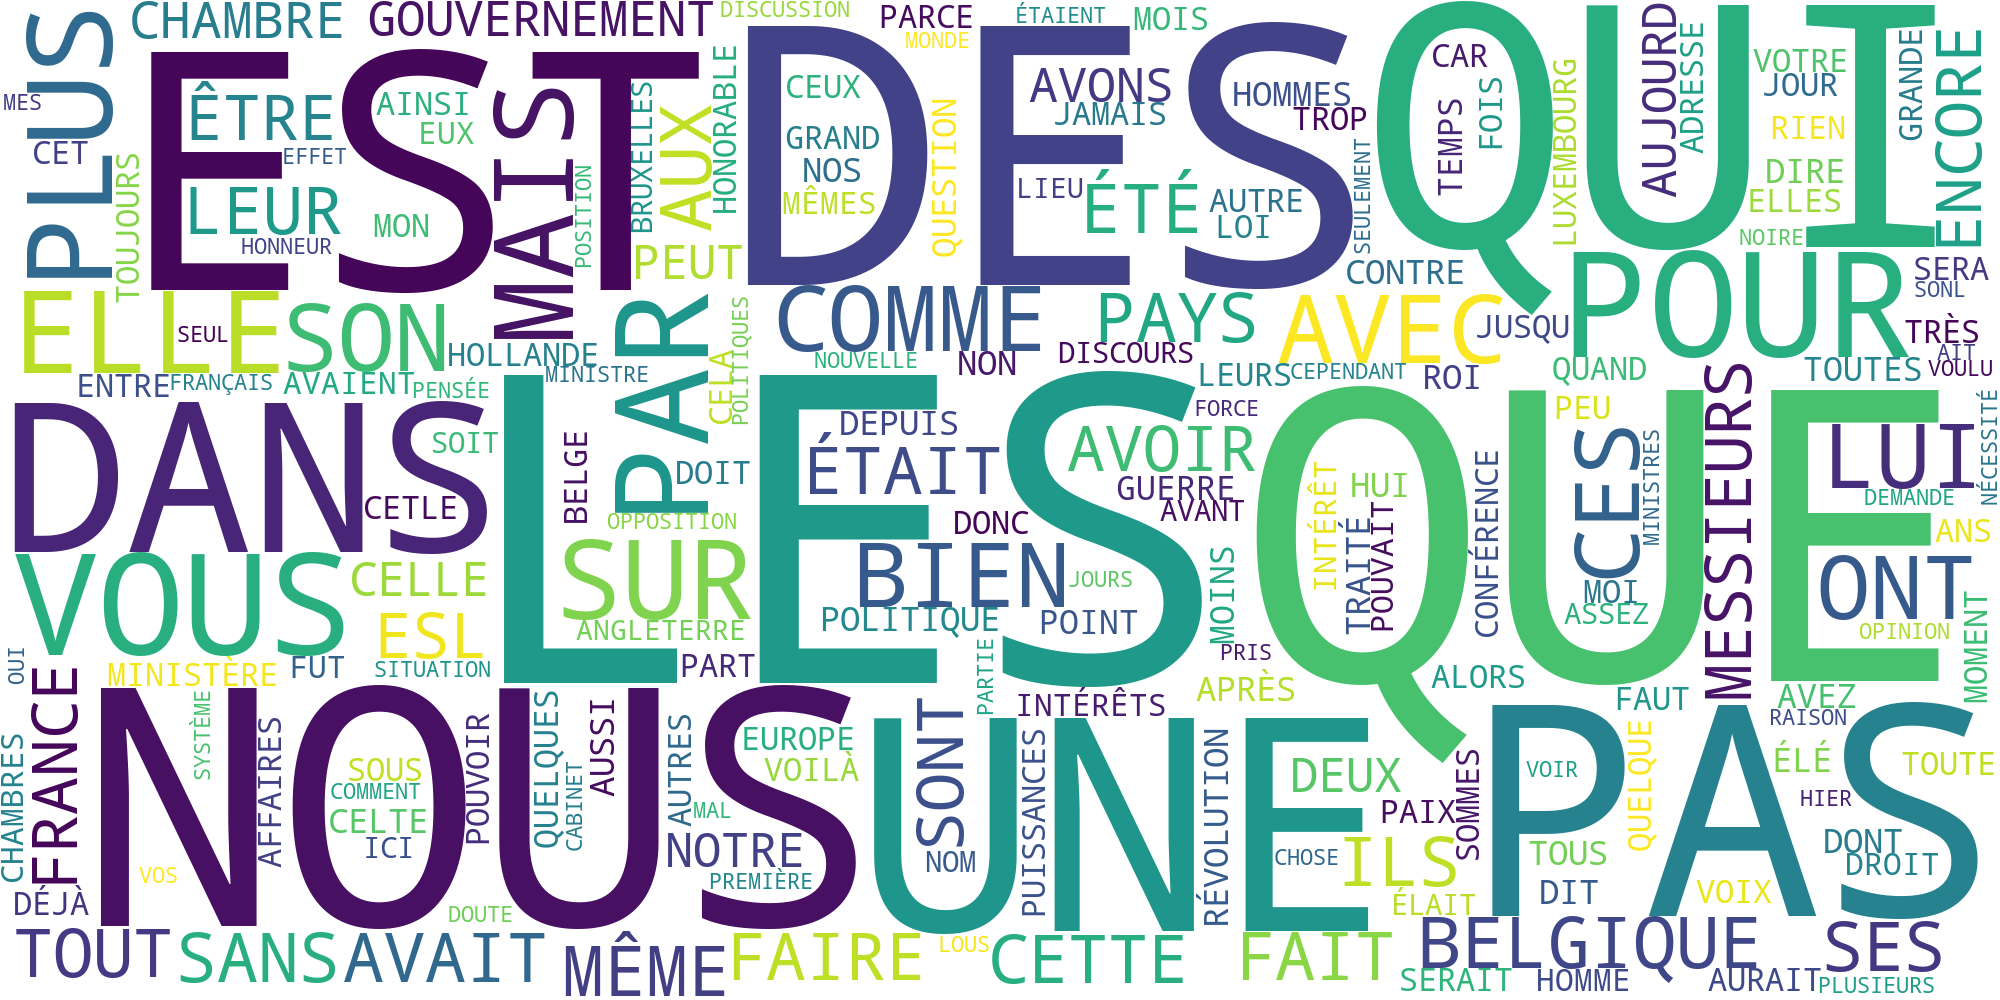

In [49]:
cloud = WordCloud(width=2000, height=1000, background_color='white').generate_from_frequencies(frequencies)
cloud.to_file(os.path.join(temp_path, f"{year}.png"))
Image(filename=os.path.join(temp_path, f"{year}.png"))